# Introduction
I've never used the Open Food Facts database before and have no bias either way. I thought that as it is an an open database it would be interesting to look into the data and see if there any potential issues.
*Edit: My original thought had been to look at how this database could be used for analysis, but I swiftly realised that this isn't its purpose. This is a reference database.*

**Qusetions that might be interesting**
* What is the mix of creators and how might that affect the data?
* Are there a lot of modifications to the database and why would that happen?
* Do certain users make a lot of modifications?
* What type of data is commonly missing?
* Is there a bias for certain countries?
* What relvance do the cities and stores data have?

# Goal
Establish where the Open Food Facts database is most likely to have errors and why. The goal is not to prove any errors, merely highlight potential bias in the data. Verifying errors would mean checking hundreds of thousands of products (I don't fancy that.) 

## What do Open Food Facts say about this?
Their website says

> "The information and data is submited by the Open Food Facts contributors. The contributors also send pictures of the product, its labels, ingredients lists and nutrition facts table. When in doubt, visitors can thus check the accuracy by themselves, and if there is an error, they can correct it on the spot."

The model would hopefully encourage accuracy but it's possible that country levels differences, systemic errors or real bastards might cause issues with the data.

# Summary of findings
## Executive Summary
The Open Food Facts database is a good reference database. However, it shouldn't not be used as a method of analysing any national or international trends (which would presumably be the inclination of many users on Kaggle). 

The reliability of the database comes from (1) It's requirement for images (2) Keeping a record of checks that have been completed or need to be, 'aka states' (3) The ability for users to enter many items of information, e.g. brands, or nutrional grade (4) There is some ability to audit the content creators.

The 'issues' with the database  for a method of anlysis stem from it not having a huge adoption and incomplete data. (n.b. I use the term 'issue' very liberally, I'm not suggesting it is wrong. merely inadequate for some purposes.) It's very likely that the database will continue to become a better and better resource as we see there has been an increasing trend of creation. Most notably the addition of US Department of Agiculture data could be a big moment, if more government data becomes available then this would be a formidable database.

The key thing I'm taking away from this is that though there are many weaknesses, increasing usage and creation suggests that this could be a great database in few years.

## Detailed summary
The database is 50% American items, almost 30% French and the majority of the remaining is a split of European countries. Almost all American items have been created by the US department of agriculture. (This is a huge boon for the database.) Items for all other countries come from a mix of sources. This is good but it immediately shows that the global value of the database is currently limited, even in terms of Europe, plus minimal information from outside of The West. It also only contains country specific fields for France and the UK (the UK one isn't used).

The data that gets entered at creation is optional. The result of this is that 72.22 % of columns are missing >=70% of their data. This is almsot entirely caused by columns the US department of agriculture hasn't had data for. It's understandable but makes wider comparison more difficult. For example, we may want to look at additives if we're interested in health concerns; The French data includes a lot for additives, the US includes none.

Modifications may have been an interesting question. It could give us some idea of user activity, purposefully adding incorrect data, or the amount of people who have worked to improve the database. However, there isn't a detailed modification history, including the fact that we can't see users who did modifications. It's possible that creation is also considered to be a modification (see the last graphs in the analysis) which muddies the water much further.

The final things that makes this a difficult tool for national or international analysis is that it doesn't contain any consumption or sales data. This was obviously never the intention of the database, so it isn't failing in anyway, it's just unfortunate as it would have made it a phenomenal tool.

In [21]:
# coding=utf8
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

#load food data from file
df = pd.read_csv("../input/en.openfoodfacts.org.products.tsv", sep='\t',low_memory=False)

In [22]:
rows = df.shape
rows = rows[0]
print(rows)
test = df

333824


# Creators

In [23]:
test = df
def stack_values(col):
    counts = test[col].value_counts()
    counts = counts.to_frame(name='counts')
    counts['percentage'] = counts['counts']/rows

    top_10 = round(sum(counts[0:10]['percentage']),2)*100
    print("The 10 main", col,"account for", top_10,"% of all contributions")

def top_ten(col):
    counts = test[col].value_counts()
    counts = counts.to_frame(name='counts')
    counts['percentage'] = counts['counts']/rows

    top_10 = round(sum(counts[0:10]['percentage']),2)*100
    print("The 10 main", col,"account for", top_10,"% of all contributions \n")
    print(counts.head(10))
    
#print(stack_values('creator'))
print(top_ten('creator'))

The 10 main creator account for 84.0 % of all contributions 

                            counts  percentage
usda-ndb-import             169868    0.508855
openfoodfacts-contributors   42472    0.127229
kiliweb                      21339    0.063923
date-limite-app              12719    0.038101
openfood-ch-import           11469    0.034356
tacite                        7419    0.022224
sebleouf                      6062    0.018159
tacinte                       4589    0.013747
javichu                       2768    0.008292
stephane                      2691    0.008061
None


### Who are the top 10?
* **usda-ndb-import** is the US Department of Agriculture and they're responsible for delivering 50.9% of all data
* **openfoodfacts-contributors** accounts for 12.7%. This group is about 20 main contributors but we don't know a lot about them. The site has documented them and their contributions on 'https://launchpad.net/openfoodfacts/+topcontributors' but there is nothing confirming their authority as reputable sources, or noting if they've been under a QA process
* **date-limite-app** accounts for 3.8%. This looks like it comes from a for profit app, http://appshopper.com/food-drink/date-limite.

**Conclusion:** We have verifiable sources for 67.4% of our total data. The rest isn't verifiable.

As noted earlier, this doesn't mean it's bad, it just means there's a big question mark over that.

### Unknown
* kiliweb
* openfood-ch-import
* tacite
* sebleouf
* tacinte
* javichu
* stephanie



# Looking for biased data
This section runs through all the columns to find ones where a small portion represent a unexpectedly large amount. We can then highlight these as areas for for further investigation.

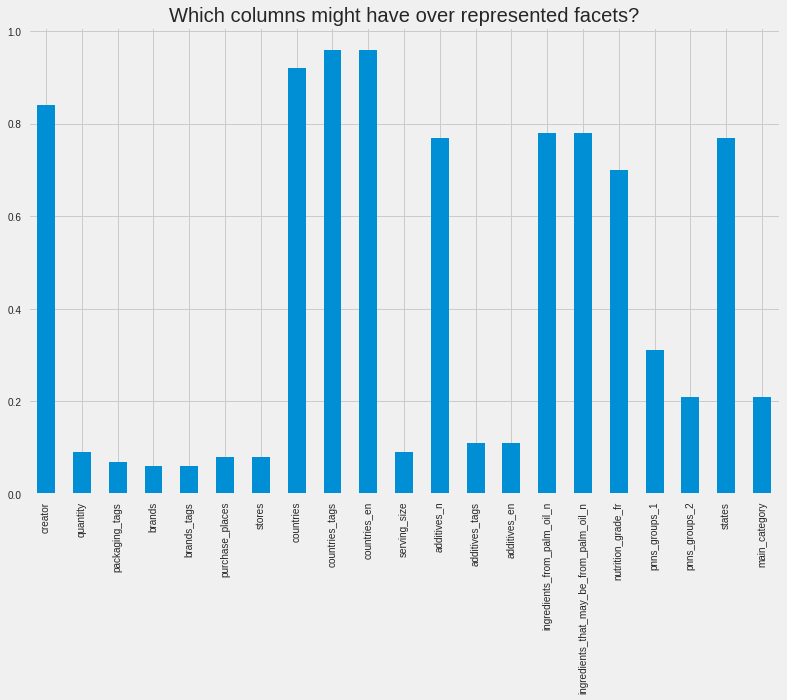

In [24]:
#columns = df.columns
columns = ['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 
           'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 
           'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags',
           'first_packaging_code_geo', 'cities', 'purchase_places', 'stores', 'countries', 
           'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 
           'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 
           'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 
           'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 
           'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1',
           'pnns_groups_2','states', 'main_category']

unusual_skew={}

for c in columns:
    counts = test[c].value_counts()
    counts = counts.to_frame(name='counts')
    counts['percentage'] = counts['counts']/rows
    pct = round(sum(counts[0:10]['percentage']),2)
    if pct > 0.05:
        unusual_skew[c] = pct

unusual_df = pd.DataFrame.from_dict(unusual_skew, orient='index')
unusual_df.plot(kind='bar', figsize=(12,8), title="Which columns might have over represented facets?", legend=False)

#unusual_skew.plot(kind="bar", figsize=(12,8), title="Which columns might have overrepresented facets?")


### Based on this list the things to investigate are:
* Countries
* States
* Brands
* Stores
* Additives
* ingredients_that_may_be_from_palm_oil_n
* nutrition_grade_fr and nutrition_grade_uk (for FR these are lettered, for UK it is blank)
* main_category

The function errored when it reached fields meausre by 100g. This isn't an issue. We will investigate these later.

### Splitting them into simple and complex fields
I break them into two lists for simplicity. One os categories we can investogate clearly. The other is areas that will require more investigation. For example 'states' does not refer to US States. It refers to whether the items need to be checked or approved in the database.

I have removed nutrition grades. The data only exists for France (UK nutrition grade is blank) and is simply a lettering system and recorded on the Open Food Facts system, https://fr-en.openfoodfacts.org/nutrition-grades

In [25]:
simple_checks = ['countries', 'brands', 'stores', 'main_category']

# States are not US states. It refers to the state of the entry, e.g. 'To be completed.
# Additives need to be checked
# I don't yet understand palm oil in anyway
complex_checks = ['states', 'additives', 'ingredients_that_may_be_from_palm_oil_n']

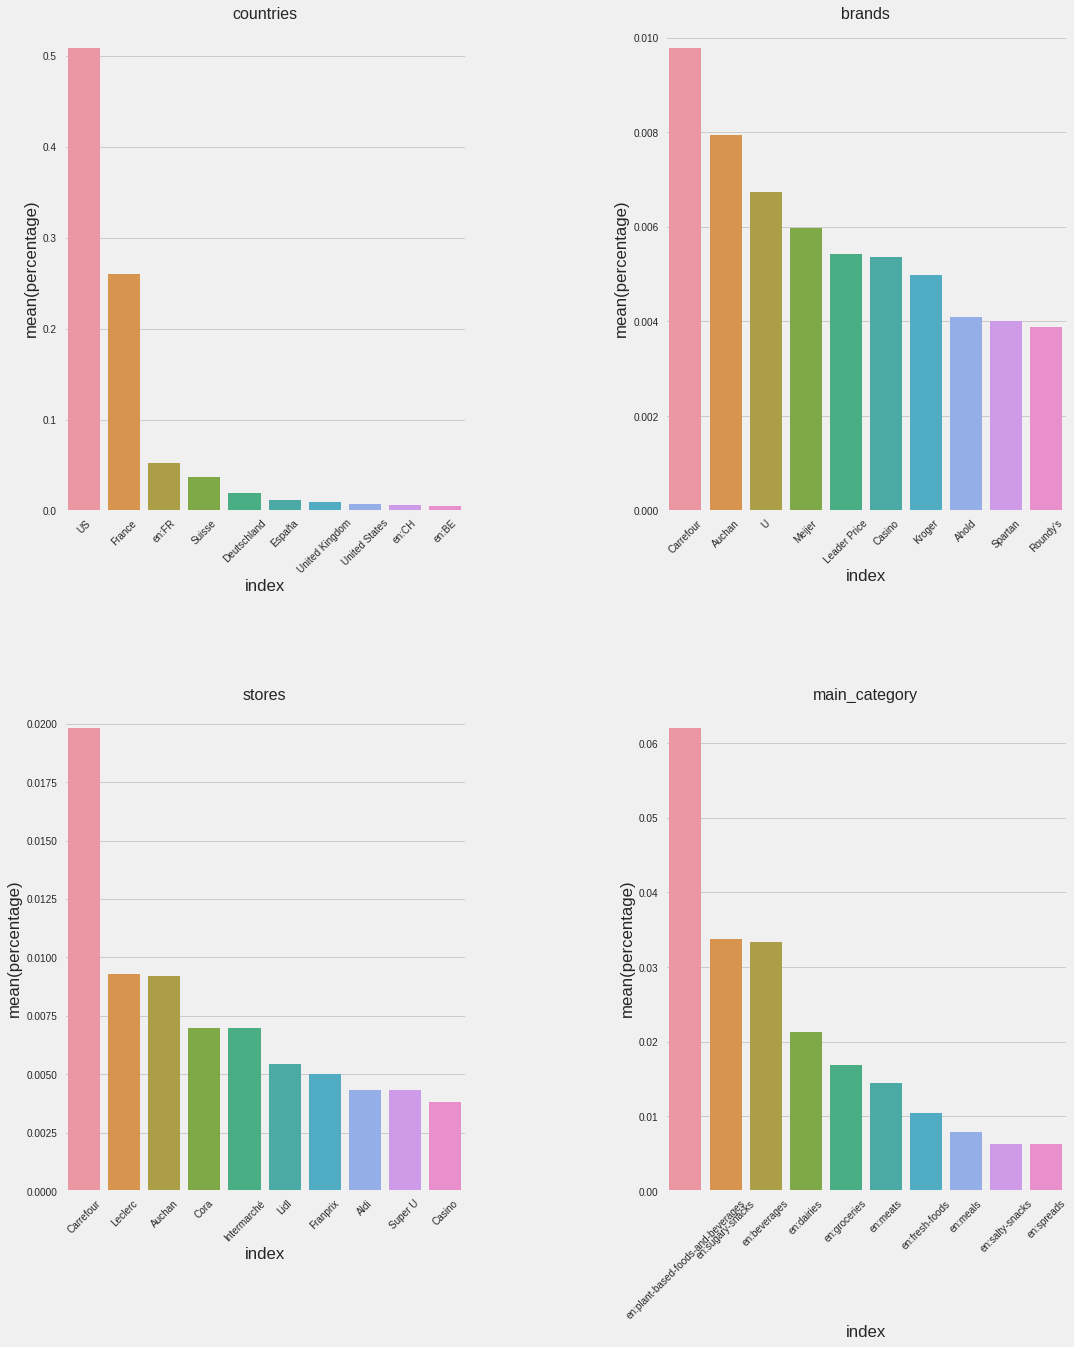

In [26]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig = plt.figure(figsize=(16,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax_list = [ax1,ax2,ax3,ax4]
plt.subplots_adjust(hspace=0.4, wspace=0.5)

axes_count = 0
for c in simple_checks:
    counts = df[c].value_counts()
    counts = counts.to_frame(name='counts').reset_index()
    counts['percentage'] = counts['counts']/rows
    counts.drop(['counts'], axis = 1, inplace = True)
    counts_ten = counts[0:10]
       
    g = sns.barplot(x='index', y='percentage', data=counts_ten, ax=ax_list[axes_count])
    g.set_xticklabels(rotation = 45, labels=counts['index'])
    
    sns.despine()
    ax_list[axes_count].set_title(c, fontsize=16)
    axes_count += 1

plt.show()

## Notes on the graphs
* The US (>50%) and France (>20%) dominate the lists. Note that France is the 2nd and 3rd items.
* Brands and stores don't reveal many interesting facts. The primary thing is the domination of Carrefour, the French supermarket chain, which is most notable because it and other stores appears to outperform all US stores. 
    * Do Stores hold any valuable information? Supermarkets, rather than brands, would have less reason to hide any information so this probably isn't relevant to whether we can trust the data.
* The Main Categories are interesting. The dominating one is plant based foods and beverages (6%). Followed by sugary snacks (3%) and beverages (3%)
    * An interesting question is what countries these are represented by, or if it's an equal split.

## Stores

In [27]:
print("What stores are in the US? \n")
print(df[df['countries']== "US"]['stores'].value_counts())

What stores are in the US? 

Series([], Name: stores, dtype: int64)


## Brands

In [28]:
print("What brands are in the US? \n")
us = df[df['countries']== "US"]
print(us['brands'].value_counts().head(10))
What brands are in the US?

What brands are in the US? 

Meijer           1992
Kroger           1640
Ahold            1369
Spartan          1341
Roundy's         1299
Great Value      1194
Weis             1052
Target Stores     946
Shoprite          943
Food Club         831
Name: brands, dtype: int64
Object `US` not found.


In [30]:
print("What brands are in France? \n")
france = df[(df['countries']=="France") | (df['countries']=="en:FR")]
print(france['brands'].value_counts().head(10))

What brands are in France? 

Carrefour        2997
Auchan           2565
U                2207
Leader Price     1768
Casino           1751
Cora             1090
Picard            976
Monoprix          812
Fleury Michon     552
Dia               534
Name: brands, dtype: int64


## Main_Category
The US only has one item in one category. So we see a big issue in the ability to group and categorise our foods.

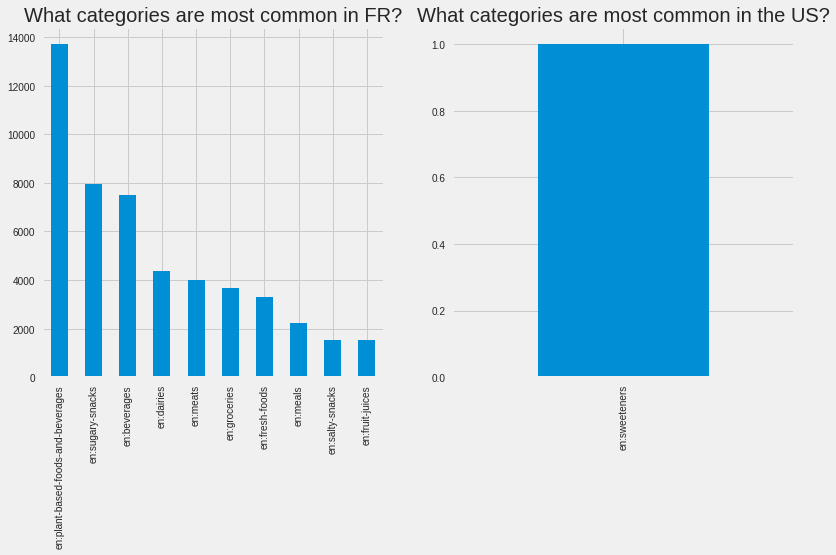

In [31]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fr_values = france['main_category'].value_counts()
us_values = us['main_category'].value_counts()
fr_values[0:10].plot(kind='bar', ax=ax1, title="What categories are most common in FR?")
us_values[0:10].plot(kind='bar', ax=ax2, title="What categories are most common in the US?")
plt.show()

## Palm Oil
The primary ingredient that we see is literally Palm Oil (aka 'huile de palm'), wikipedia page is https://fr.wikipedia.org/wiki/Huile_de_palme

It's almsot entirely for French products. Notable though it has been added by a mix of contributors.




In [32]:
#facets = ['countries', 'brands', 'creator']
palm_df = df[df['ingredients_from_palm_oil_tags'].notnull()]
palm_countries = palm_df['countries'].value_counts()
print(palm_countries[0:10])
palm_creators = palm_df['creator'].value_counts()
print("\n Creators of Palm Oil entries")
print(palm_creators[0:10])

France             3874
Suisse              911
Belgique             53
Belgique,France      41
en:CH                37
France, Suisse       36
Madagascar           34
en:FR,France         34
Switzerland          31
France,Suisse        24
Name: countries, dtype: int64

 Creators of Palm Oil entries
openfoodfacts-contributors    1246
openfood-ch-import             828
tacite                         624
kiliweb                        471
sebleouf                       307
jeanbono                       108
date-limite-app                 85
tacinte                         72
miles67off                      72
agamitsudo                      56
Name: creator, dtype: int64


In [33]:
print("\n Main entries in Palm Oil")
palm_values = palm_df['ingredients_from_palm_oil_tags'].value_counts()
print(palm_values[0:10])


 Main entries in Palm Oil
huile-de-palme                                                5159
e304-palmitate-d-ascorbyle                                     170
huile-de-palme,e304-palmitate-d-ascorbyle                       44
oleine-de-palme                                                 22
mono-et-diglycerides-d-acides-gras-de-palme                     12
huile-de-palme,stearine-de-palme                                 6
e304-palmitate-d-ascorbyle,huile-de-palme                        6
huile-de-palme,oleine-de-palme                                   3
oleine-de-palme,e304-palmitate-d-ascorbyle                       2
huile-de-palme,mono-et-diglycerides-d-acides-gras-de-palme       2
Name: ingredients_from_palm_oil_tags, dtype: int64


## Additives

In [34]:
#facets = ['countries', 'brands', 'creator']
add_df = df[df['additives'].notnull()]
add_countries = add_df['countries'].value_counts()
print(add_countries[0:10])
add_creators = add_df['creator'].value_counts()
print("\n Creators of Additive entries")
print(add_creators[0:10])

US                169814
France             60465
Suisse              7160
Deutschland         4802
España              3666
United Kingdom      2134
United States       1511
Australia            667
en:FR,France         635
Россия               509
Name: countries, dtype: int64

 Creators of Additive entries
usda-ndb-import               169862
openfoodfacts-contributors     15456
kiliweb                         9029
tacite                          7025
openfood-ch-import              6456
sebleouf                        5673
javichu                         2765
tacinte                         2625
twoflower                       1893
stephane                        1849
Name: creator, dtype: int64


In [35]:
print("\n Main entries in Additives")
add_values = add_df['additives'].value_counts()
print(add_values[0:10])


 Main entries in Additives
 [ extra-virgin-olive-oil -> en:extra-virgin-olive-oil  ]  [ virgin-olive-oil -> en:virgin-olive-oil  ]  [ olive-oil -> en:olive-oil  ]  [ oil -> en:oil  ]                                                                                                                                                                                                                                                                                                                          397
 [ almonds -> en:almonds  ]                                                                                                                                                                                                                                                                                                                                                                                                                                                          274
 [ honey -> en:honey  ]   

# States

This is a complex field to analyse. Each row contains multiple values. As an example, for one food item, on one row the state may be recorded as 
> en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-uploaded

To see if we want to analyse this we will break down the unique values and see if it warrant further investigation

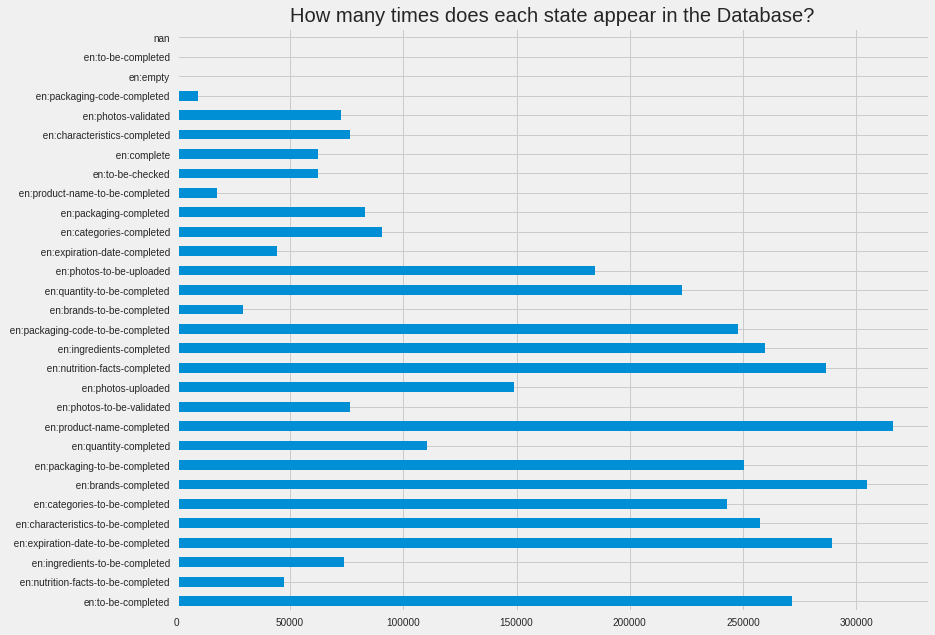

In [ ]:
states_values = df['states'].astype(str).tolist()
#states_values = states_values.astype(str)
states_values = [state for states in states_values for state in states.split(',')]
#print(len(states_values)) # Just used to see the number of values

from collections import Counter
states_counts = Counter(states_values) # Counter literally counts the values and turns them into a dictionary
states_df = pd.DataFrame.from_dict(states_counts, orient='index')
states_df.plot(kind='barh', legend=False, figsize=(12,10), title="How many times does each state appear in the Database?")

# *** This block allows viewing unique values***
#myset = set(states_values)
#print(len(myset))
#print(myset)


# Missing data

In [ ]:
cols = df.columns
low_data_cols = []
missing_pct = {}

for c in cols:
    empty_pct = round(len(df[pd.isnull(df[c])])/rows,2)
    if empty_pct >= 0.7:
        missing_pct[c]=empty_pct
        low_data_cols.append(c)

low = round((len(low_data_cols)/len(cols))*100,2)
print(low,"% of columns are missing >=70% of their data. \nThose columns are,")
print(len(df['creator'].isnull()))
print(missing_pct)

# Times of changes by original contributor and country
Using line charts to track the volume of changes over time
* Turn modified datetimes to month and year
* Use the DataQuest blog to work through making it beautiful

In [ ]:
mods = round(((len(df[pd.notnull(df['last_modified_datetime'])]))/rows*100),2)
print("The percentage of modified rows is",mods,"%")

In [ ]:
top_ten_creators = df['creator'].value_counts()
top_ten_creators = top_ten_creators.index.tolist()

top_creators = df.loc[(df['creator']=='usda-ndb-import') | (df['creator']=='openfoodfacts-contributors') | (df['creator']=='kiliweb') | (df['creator']=='date-limite-app') | 
                  (df['creator']=='openfood-ch-import') | (df['creator']=='tacite') | (df['creator']=='sebleouf') | (df['creator']=='tacinte') | 
                  (df['creator']=='javichu') | (df['creator']=='stephane')][['creator','last_modified_datetime']]

top_creators['mod_datetime'] = top_creators['last_modified_datetime'].apply(lambda x: x[0:4])
top_creators.drop('last_modified_datetime', axis=1)

mod_pivot = pd.pivot_table(top_creators, 
                           index=top_creators['mod_datetime'], 
                           columns='creator', 
                           aggfunc=len, fill_value=0)
#print(mod_pivot)


In [ ]:
mod_pivot.plot(kind='line', figsize=(12,6), title="When were modifications made and by who?")


In [ ]:
top_creators = df.loc[(df['creator']=='usda-ndb-import') | (df['creator']=='openfoodfacts-contributors') | (df['creator']=='kiliweb') | (df['creator']=='date-limite-app') | 
                  (df['creator']=='openfood-ch-import') | (df['creator']=='tacite') | (df['creator']=='sebleouf') | (df['creator']=='tacinte') | 
                  (df['creator']=='javichu') | (df['creator']=='stephane')][['creator','created_datetime']]

top_creators['mod_datetime'] = top_creators['created_datetime'].apply(lambda x: x[0:4])
top_creators.drop('created_datetime', axis=1)

mod_pivot = pd.pivot_table(top_creators, 
                           index=top_creators['mod_datetime'], 
                           columns='creator', 
                           aggfunc=len, fill_value=0)
mod_pivot.plot(kind="line", figsize=(12,8), title="When were items created?")